## 📌ACTIVIDAD 2: UN CASO MÁS REAL

Crea el fichero u02_p03_a2_reglin_<tus_iniciales>.py. Vamos a trabajar con los datos del fichero "seguros_de_coches.csv" que utiliza una compañía aseguradora

Hay 3 tipos de características:
(a) La especificación de un automóvil en términos de diferentes características.

(b) Su calificación de riesgo de seguro asignada. Es un indicador del grado en que el automóvil es más problemático de lo que indica su precio. Inicialmente, a los automóviles se les asigna un símbolo de factor de riesgo asociado con su precio. Luego, si es más arriesgado (o menos), este símbolo se ajusta moviéndolo hacia arriba (o hacia abajo) en la escala. Los
profesionales llaman a este proceso “symboling”. Un valor de 3 indica que el automóvil es
riesgoso y -3 que probablemente sea bastante seguro.

(c) El pago medio relativo por pérdida por año de vehículo asegurado. Este valor está
normalizado para todos los automóviles dentro de una clasificación de tamaño particular (twodoor small, station wagons, sports/speciality, etc…) y representa la pérdida promedio por
automóvil por año.
Hay que tener en cuenta que los valores ausentes están definidos con un “?”.

Completa los siguientes pasos en el fichero Python comenzando por:

a) Cargar los datos en un Dataframe, (adapta la ruta al código de la siguiente figura).

b) Mostrar los 5 primeros ejemplos por pantalla (completa y obtén mismos resultados).

c) Muestra un resumen de las columnas del dataset (completa y obtén mismos resultados). 

#### Carga de Librerías

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Carga del Dataset en un Dataframe

In [45]:
#Carga del CSV
#df = pd.read_csv('seguros_de_coches.csv', na_values=["?"])
#Mostramos datos
#df.head()

columnas = ['symboling', 'perdidas_normal', 'marca', 'combustible', 'inyección',
            'puertas', 'chasis', 'traccion', 'lugar_de_motor', 'potencia_base',
            'longitud', 'anchura', 'altura', 'peso', 'tipo_motor',
            'cilindros', 'tamaño_motor', 'sistema', 'calibre', 'ataque',
            'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad',
            'precio']

autos = pd.read_csv("seguros_de_coches.csv", header=None, names=columnas, na_values='?', delimiter=",")


autos.info()


autos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   perdidas_normal    164 non-null    float64
 2   marca              201 non-null    object 
 3   combustible        201 non-null    object 
 4   inyección          201 non-null    object 
 5   puertas            199 non-null    object 
 6   chasis             201 non-null    object 
 7   traccion           201 non-null    object 
 8   lugar_de_motor     201 non-null    object 
 9   potencia_base      201 non-null    float64
 10  longitud           201 non-null    float64
 11  anchura            201 non-null    float64
 12  altura             201 non-null    float64
 13  peso               201 non-null    int64  
 14  tipo_motor         201 non-null    object 
 15  cilindros          201 non-null    object 
 16  tamaño_motor       201 non

(201, 26)

In [46]:
autos.head()


,symboling,perdidas_normal,marca,combustible,inyección,puertas,chasis,traccion,lugar_de_motor,potencia_base,...,tamaño_motor,sistema,calibre,ataque,ratio_compresion,potencia_cv,max_rpm,consumo_carretera,consumo_ciudad,precio
0,3,NaN,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


#### DATOS AUSENTES Y CATEGÓRICOS

Los datos se han cargado remplazando los símbolos “?” como valores ausentes NaN. como estaba definido en la información del dataset. Primero sumarizamos los datos ausentes por característica.

Luego nos podemos fijar en el listado que nos ha devuelto el método autos.info() y todas las que no tengan un tipo numérico (intX y floatX) serán categóricas de una u otra forma

In [47]:
# Valores ausentes y columnas categóricas
print("========== Valores ausentes: \n", autos.isna().sum())

cols_categoricas = ["marca", "sistema", "combustible","inyección","puertas","chasis","traccion","lugar_de_motor","tipo_motor","cilindros"]  # Completa el array!!!
autos[cols_categoricas] = autos[cols_categoricas].astype("category")

autos["puertas"] = pd.Categorical(autos["puertas"], categories=["two", "four"], ordered=True)
autos["cilindros"] = pd.Categorical(autos["cilindros"],
                                     categories=["two", "three", "four", "five", "six", "eight", "twelve"],
                                     ordered=True)
#autos[""]
print("========== Cambiamos a tipo category:\n", autos.info())

========== Valores ausentes: 
 symboling             0
perdidas_normal      37
marca                 0
combustible           0
inyección             0
puertas               2
chasis                0
traccion              0
lugar_de_motor        0
potencia_base         0
longitud              0
anchura               0
altura                0
peso                  0
tipo_motor            0
cilindros             0
tamaño_motor          0
sistema               0
calibre               4
ataque                4
ratio_compresion      0
potencia_cv           2
max_rpm               2
consumo_carretera     0
consumo_ciudad        0
precio                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   perdidas_normal    164 non-null    float64 
 2   marca              201 non

Se debe hacer un análisis de cada una de las variables y describir
sus propiedades. Realizar el análisis univariado es muy
importante para entender el comportamiento de cada una de las
variables y poder detectar posibles problemas en los datos. Nunca
hay que saltarse este paso. Por ejemplo vas a contar cuantas veces
aparece cada valor de las columnas categóricas. Aquellas
columnas que tengan valores que solamente aparezcan una vez,
las añades al array cols_categoricas_escasas

In [55]:

cols_categoricas_escasas = []

for col in cols_categoricas:
    value_counts = autos[col].value_counts()
    
    # Si existe al menos una categoría con solo 1 aparición, la columna se considera escasa
    if (value_counts == 1).any():
        cols_categoricas_escasas.append(col)

print("Columnas con valores escasos:", cols_categoricas_escasas)


for col in cols_categoricas:
    print(autos[col].value_counts())
    print("")
    


Columnas con valores escasos: ['marca', 'sistema', 'cilindros']
marca
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romeo        3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

sistema
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

combustible
gas       181
diesel     20
Name: count, dtype: int64

inyección
std      165
turbo     36
Name: count, dtype: int64

puertas
four    113
two      86
Name: count, dtype: int64

chasis
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

traccion
fwd    118
rwd    

Algunos valores categóricos solo aparecen en un único ejemplo, es el caso de la característica “marca”
donde “mercury” solamente aparece una vez y eso puede dar problemas a los encoders. Igual ocurre
con otras características. Una solución es ocuparse de estos casos en la fase de ingeniería de
características (es lo que haremos en este ejemplo). Pero se puede perder conocimiento.
Otra solución es añadir más datos (posibilidad que no tenemos) o encargarse de garantizar que
siempre estén estos ejemplos en el conjunto de entrenamiento. Este procedimiento necesita una
implementación más compleja. Podemos crearnos un dataset temporal y añadirlo a los datos de train
los ejemplos con valores escasos de manera artificial. Para ello creamos una condición para cada
característica que tenga estos valores escasos y podemos generar sus datos. Completa las dos
condiciones que faltan del siguiente código:


In [59]:
cond_1 = "sistema in ['mfi','spfi']"
cond_2 = "marca == 'mercury'"
cond_3 = "cilindros in ['three', 'twelve']"

#Estos registros se añaden en el conjunto de entrenamiento para evitar que se pierdan
#al hacer la división de los datos
unir_a_train = autos.query(f"{cond_1} | {cond_2} | {cond_3}")
#Mostramos
print("Datos que no debemos perder:\n", unir_a_train)


Datos que no debemos perder:
     symboling  perdidas_normal      marca combustible inyección puertas  \
17          2            121.0  chevrolet         gas       std     two   
28          3            145.0      dodge         gas     turbo     two   
43          2              NaN      isuzu         gas       std     two   
46          0              NaN     jaguar         gas       std     two   
72          1              NaN    mercury         gas     turbo     two   

       chasis traccion lugar_de_motor  potencia_base  ...  tamaño_motor  \
17  hatchback      fwd          front           88.4  ...            61   
28  hatchback      fwd          front           95.9  ...           156   
43  hatchback      rwd          front           96.0  ...           119   
46      sedan      rwd          front          102.0  ...           326   
72  hatchback      rwd          front          102.7  ...           140   

    sistema  calibre  ataque ratio_compresion potencia_cv  max_rpm  

### ESTUDIAR ESTADÍSTICAS DE PAREJAS VARIABLES

En primer lugar vamos a estudiar si todas las características numéricas influyen de manera lineal en el target. Podemos hacerlo de manera visual creando **Scatterplot()** de cada una con el target

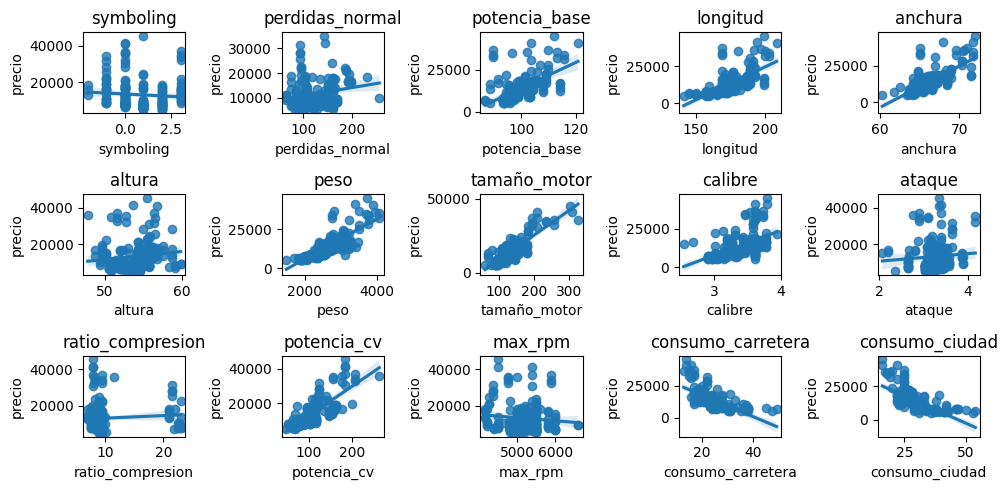

In [52]:
#===== Análisis bivariable
#generar listado de variables numéricas excepto target
cols_numericas = (autos.drop(columns=["precio"]).select_dtypes (include=np.number).columns.tolist())
n_cols_numericas = len(cols_numericas)  # Gráficos de regresión simple con target

import seaborn as sns
import math

fig, ejes = plt.subplots(math.ceil(n_cols_numericas / 5), 5, figsize=(10, 5)) # son 15, plot de 5 columnas
ejes = ejes.flatten()

for i, col in enumerate(cols_numericas):
    sns.regplot(data=autos, x=col, y="precio", ax=ejes[i])
    ejes[i].set_title(col)

plt.tight_layout()
plt.show()

##### Estudiar la correlación entre variables

La correlación lineal entre las variables predictoras que sean numéricas. Visualmente se puede ver en
las graficas como las anteriores pero realizadas entre cada par de predictoras o podemos hacer el
estudio de manera numérica creando una matriz de correlaciones. Vamos a usar esta segunda
aproximación, pero antes:
- La variable "tamaño_motor" tiene una relación lineal positiva con el target.
- Pero "symboling" no tiene relación lineal y por tanto el valor de la correlación no es válido

Como estamos interesados en la cantidad de correlación y no en si esta es positiva o negativa, lo que vamos a hacer es generar la matriz de correlaciones y transformarla en sus valores absolutos para visualizar mejor los posibles casos a contemplar.

Primero ponemos la característica target la primera para que la primera fila y la primera columna se vean claramente. 

Debería aparecer lo más oscura posible. Si es inferior a 0.1 (color claro cercano al blanco) es candidata a eliminarla como predictora.

Además, si encontramos correlaciones importantes con otras predictoras es que hay columnas con colinealidad y eso tampoco es bueno, podemos eliminar la que tenga menor correlación con target


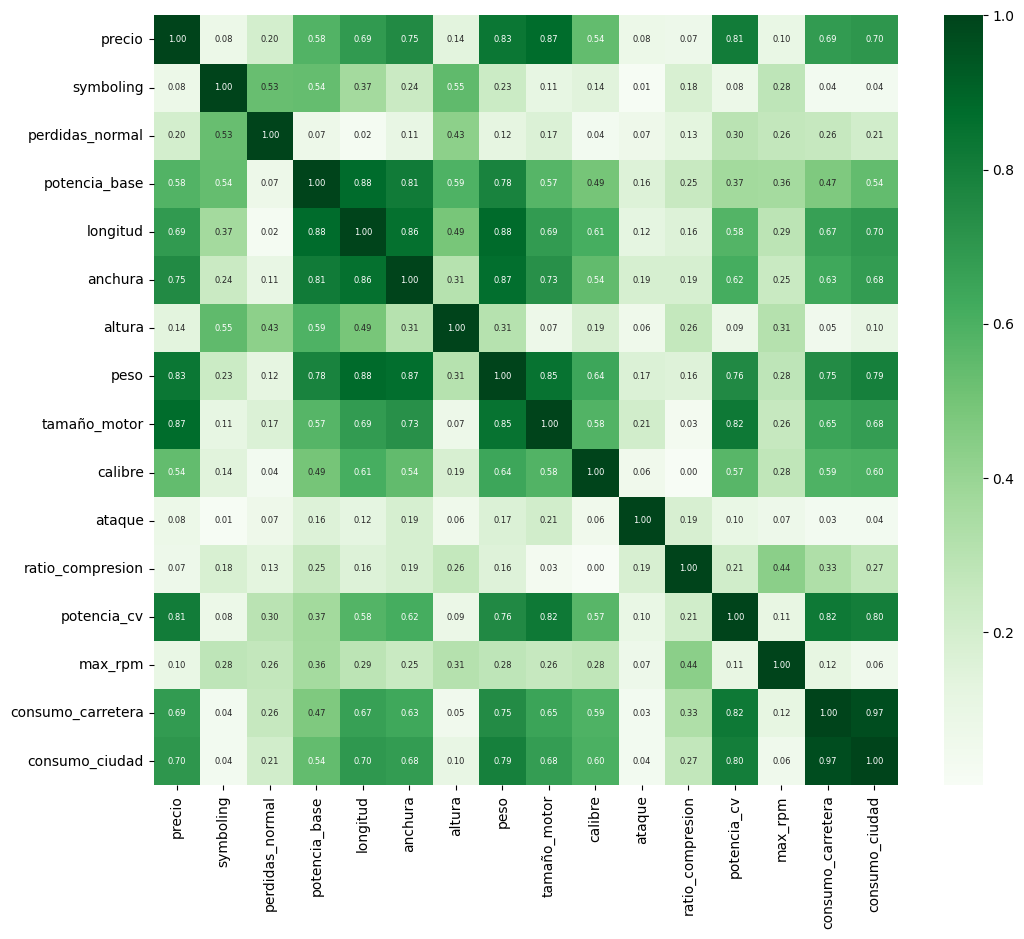

In [60]:
from matplotlib.colors import Colormap as cm

cols = autos.columns.tolist() # mover la columna precio al inicio del dataframe
cols.insert(0, cols.pop(cols.index("precio")))
autos = autos.reindex(columns=cols)

autos_matriz_correlaciones = autos.corr(numeric_only=True)

fig, ejes = plt.subplots(figsize=(12, 10))
absoluta = autos_matriz_correlaciones.abs()
sns.heatmap(absoluta, annot=True, annot_kws={'size': 6}, fmt=".2f", cmap="Greens")
plt.show()

Las características **longitud**, **anchura**, **peso** y **tamaño del motor** tienen una mayor correlación

Son candidatas a examinarlas en profundidad para eliminar algunas

A las características que tienen valores categóricos no podemos calcularles el coeficiente de correlación pero sí podemos hacerles otros test estadísticos como ANOVA (Análisis de la Varianza). Pero vamos simplemente a dibujar sus boxplot

#### Boxplot

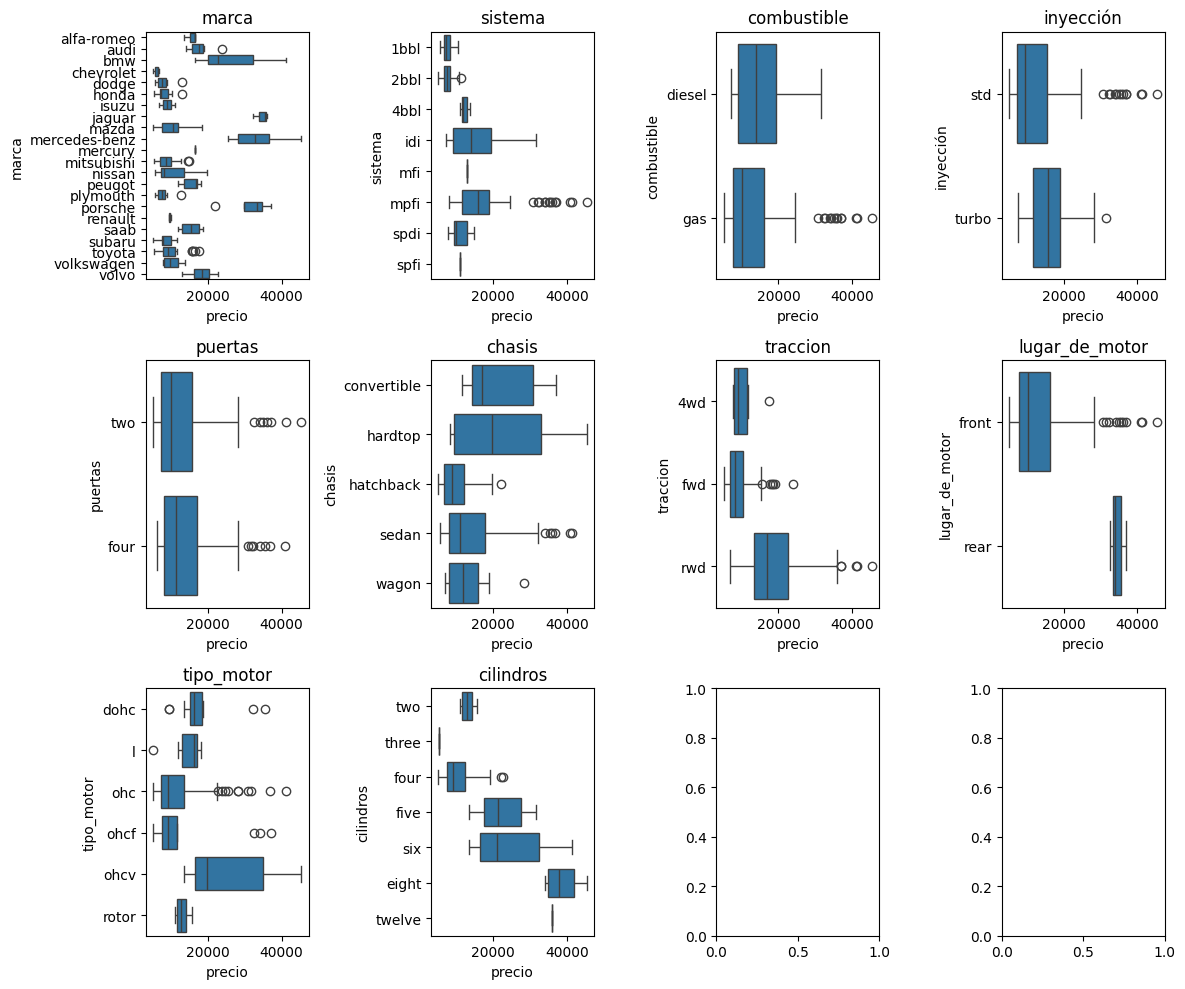

In [ ]:
# Gráficos boxplot de categóricas con el target
n_categoricas = len(cols_categoricas)

fig, ejes = plt.subplots(n_categoricas // 4 + 1, 4, figsize=(12, 12))
ejes = ejes.flatten()

for i, col in enumerate(cols_categoricas):
    sns.boxplot(data=autos, x="precio", y=col, ax=ejes[i])
    ejes[i].set_title(col)

plt.tight_layout()
plt.show()